In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io




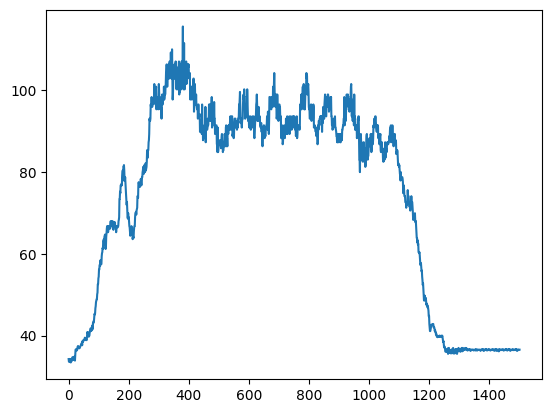

In [20]:

input_mat = io.loadmat('./SonarAlt.mat')

plt.plot(input_mat['sonarAlt'][0])
plt.show()

def get_sonar(i):
    return input_mat['sonarAlt'][0][i]







def mov_avg_filter(x_n, x_meas):
    """이동평균 이용하여 초음파 거리 계산 (배치식)."""
    n = len(x_n)
    for i in range(n-1):
        x_n[i] = x_n[i+1]
    x_n[n-1] = x_meas
    x_avg = np.mean(x_n)
    return x_avg, x_n

0.02


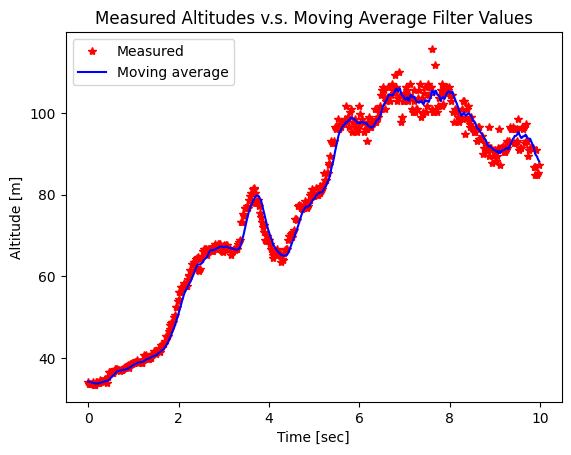

In [34]:
n = 10
n_samples = 500
time_end = 10
 
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)
print(dt)

for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)
 
    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg


plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.show()
